# Data preprocessing

In [20]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [21]:
# Loading the dataset 
df = pd.read_csv("ChatGPT-Sentiment.csv")

In [22]:
df

,tweets
0,"Noun: sedan\n\nA sedan is like a car, but it's..."
1,"AI creation story ""Humans and AI, beyond the d..."
2,Renowned Israeli Writer Compares ChatGPT To We...
3,#Zcash $ZEC #Bitcoin #Ethereum #AI #ChatGPT ht...
4,Chatbots won't replace doctors. But a new stud...
...,...
4949,@artificialguybr some things doesn't sound muc...
4950,@SerLeighton Thanks. I don’t think that ChatGP...
4951,"What's more, I don't even use chatgpt because ..."
4952,Incredible! I got the TEMU invitation code &lt...


In [23]:
# Download nltk data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Ritvik
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ritvik
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ritvik
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
# Initializing stemmer and lemmatizer
lemmatizer = WordNetLemmatizer()

In [25]:
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable


In [26]:
import emoji

# Define the function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub('', text)


# Define the cleaning function
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
   
    # Remove @username
    text = re.sub(r'\@\w+','', text)
    
   # Remove emojis
    text = remove_emojis(text)
    
    # Remove special characters and numbers
    text = re.sub(r'\W+|\d+', ' ', text)
    
     # Remove special characters and numbers
    text = re.sub(r'pos', ' ', text)
    
    # Remove special characters and numbers
    text = re.sub(r'neg', ' ', text)
    
    # Convert to lower case
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join words back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Apply the cleaning function to the dataset
df["cleaned_tweets"] = df["tweets"].apply(clean_text)

In [27]:
df

,tweets,cleaned_tweets
0,"Noun: sedan\n\nA sedan is like a car, but it's...",noun sedan sedan like car little fancy like ca...
1,"AI creation story ""Humans and AI, beyond the d...",ai creation story human ai beyond difference a...
2,Renowned Israeli Writer Compares ChatGPT To We...,renowned israeli writer compare chatgpt weapon...
3,#Zcash $ZEC #Bitcoin #Ethereum #AI #ChatGPT ht...,zcash zec bitcoin ethereum ai chatgpt
4,Chatbots won't replace doctors. But a new stud...,chatbots replace doctor new study found chatgp...
...,...,...
4949,@artificialguybr some things doesn't sound muc...,thing sound much like good chatgpt thing
4950,@SerLeighton Thanks. I don’t think that ChatGP...,thanks think chatgpt could write drama portfol...
4951,"What's more, I don't even use chatgpt because ...",even use chatgpt already writing use basically...
4952,Incredible! I got the TEMU invitation code &lt...,incredible got temu invitation code lt gt chat...


# Sentiment Analysis using VADER

In [28]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Ritvik
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
df['scores'] = df['cleaned_tweets'].apply(lambda tweets: sid.polarity_scores(tweets))

df.head()

,tweets,cleaned_tweets,scores
0,"Noun: sedan\n\nA sedan is like a car, but it's...",noun sedan sedan like car little fancy like ca...,"{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp..."
1,"AI creation story ""Humans and AI, beyond the d...",ai creation story human ai beyond difference a...,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp..."
2,Renowned Israeli Writer Compares ChatGPT To We...,renowned israeli writer compare chatgpt weapon...,"{'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'comp..."
3,#Zcash $ZEC #Bitcoin #Ethereum #AI #ChatGPT ht...,zcash zec bitcoin ethereum ai chatgpt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Chatbots won't replace doctors. But a new stud...,chatbots replace doctor new study found chatgp...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp..."


In [30]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,tweets,cleaned_tweets,scores,compound
0,"Noun: sedan\n\nA sedan is like a car, but it's...",noun sedan sedan like car little fancy like ca...,"{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp...",0.7650
1,"AI creation story ""Humans and AI, beyond the d...",ai creation story human ai beyond difference a...,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...",0.7650
2,Renowned Israeli Writer Compares ChatGPT To We...,renowned israeli writer compare chatgpt weapon...,"{'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'comp...",-0.7906
3,#Zcash $ZEC #Bitcoin #Ethereum #AI #ChatGPT ht...,zcash zec bitcoin ethereum ai chatgpt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,Chatbots won't replace doctors. But a new stud...,chatbots replace doctor new study found chatgp...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.4019


In [57]:
df['sentiment'] = df['compound'].apply(lambda c: 'pos' if c >= 0.05 else ('neg' if c <= -0.05 else 'neu'))
df.head()


,tweets,cleaned_tweets,scores,compound,sentiment,word_count,cleaned_word_count,tokens,TopicNum,Topic
0,"Noun: sedan\n\nA sedan is like a car, but it's...",noun sedan sedan like car little fancy like ca...,"{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp...",0.7650,pos,35,19,"[noun, sedan, sedan, like, car, little, fancy,...",5,Misc
1,"AI creation story ""Humans and AI, beyond the d...",ai creation story human ai beyond difference a...,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...",0.7650,pos,50,35,"[ai, creation, story, human, ai, beyond, diffe...",2,Work Products
2,Renowned Israeli Writer Compares ChatGPT To We...,renowned israeli writer compare chatgpt weapon...,"{'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'comp...",-0.7906,neg,32,21,"[renowned, israeli, writer, compare, chatgpt, ...",0,Non-Fiction Book
3,#Zcash $ZEC #Bitcoin #Ethereum #AI #ChatGPT ht...,zcash zec bitcoin ethereum ai chatgpt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,7,6,"[zcash, zec, bitcoin, ethereum, ai, chatgpt]",4,Movies
4,Chatbots won't replace doctors. But a new stud...,chatbots replace doctor new study found chatgp...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.4019,pos,19,13,"[chatbots, replace, doctor, new, study, found,...",0,Non-Fiction Book


In [58]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


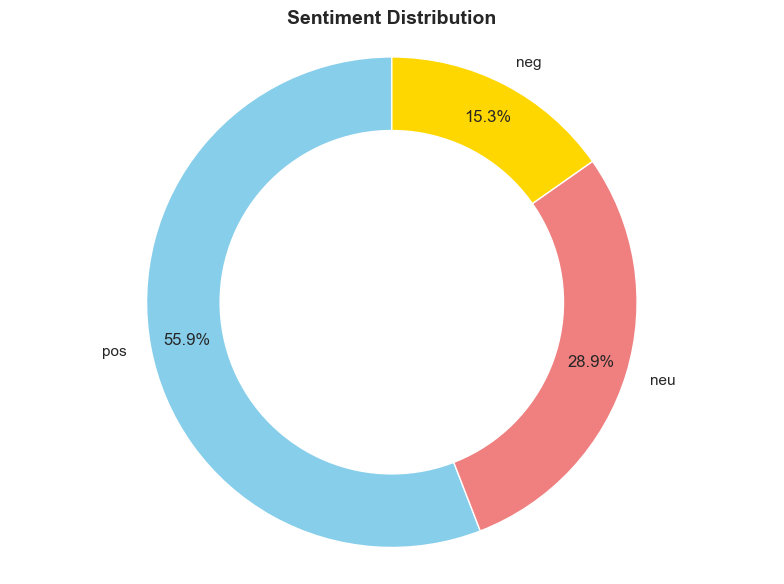

In [59]:
sentiment_count = df['sentiment'].value_counts()
labels = sentiment_count.index
sizes = sentiment_count.values
colors = ['skyblue', 'lightcoral', 'gold']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Sentiment Distribution', fontsize=14, fontweight='bold')
center_circle = plt.Circle((0,0),0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()


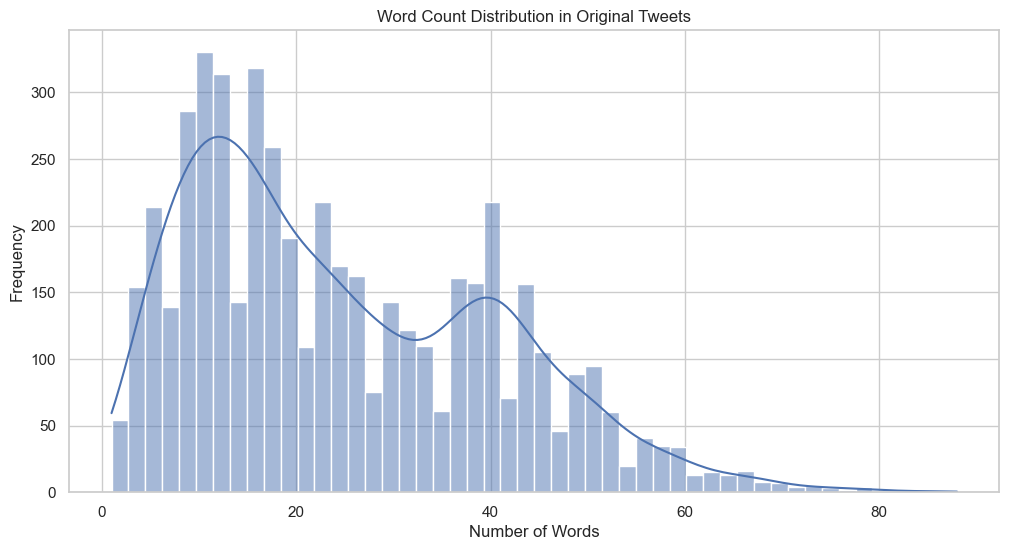

In [34]:
# Word count distribution in original tweets
df['word_count'] = df['tweets'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Word Count Distribution in Original Tweets')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

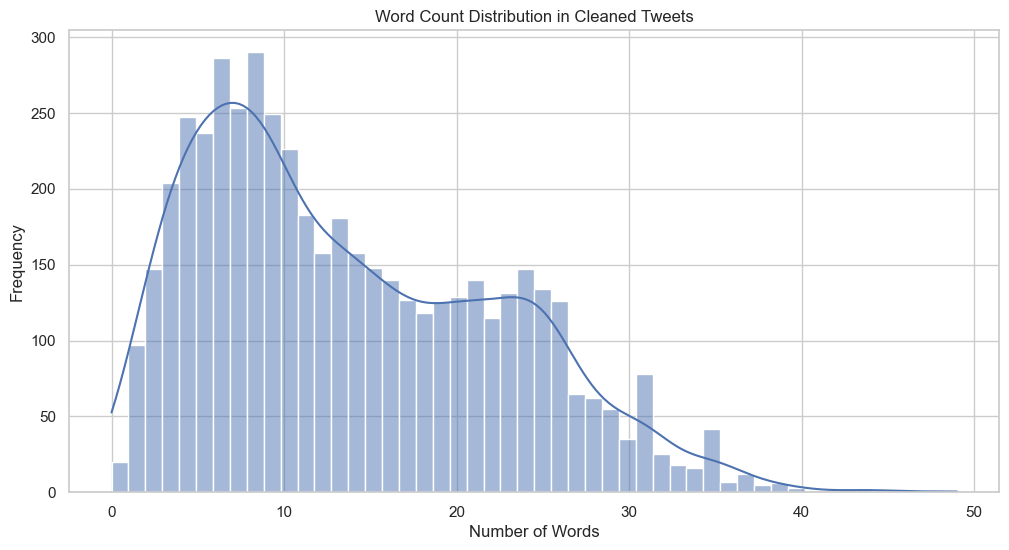

In [35]:
# Word count distribution in cleaned tweets
df['cleaned_word_count'] = df['cleaned_tweets'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.histplot(df['cleaned_word_count'], bins=50, kde=True)
plt.title('Word Count Distribution in Cleaned Tweets')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [36]:
print(df)

                                                 tweets  \
0     Noun: sedan\n\nA sedan is like a car, but it's...   
1     AI creation story "Humans and AI, beyond the d...   
2     Renowned Israeli Writer Compares ChatGPT To We...   
3     #Zcash $ZEC #Bitcoin #Ethereum #AI #ChatGPT ht...   
4     Chatbots won't replace doctors. But a new stud...   
...                                                 ...   
4949  @artificialguybr some things doesn't sound muc...   
4950  @SerLeighton Thanks. I don’t think that ChatGP...   
4951  What's more, I don't even use chatgpt because ...   
4952  Incredible! I got the TEMU invitation code &lt...   
4953  @igorbenic I paid for ChatGPT Pro for 1 month ...   

                                         cleaned_tweets  \
0     noun sedan sedan like car little fancy like ca...   
1     ai creation story human ai beyond difference a...   
2     renowned israeli writer compare chatgpt weapon...   
3                 zcash zec bitcoin ethereum ai chatgpt

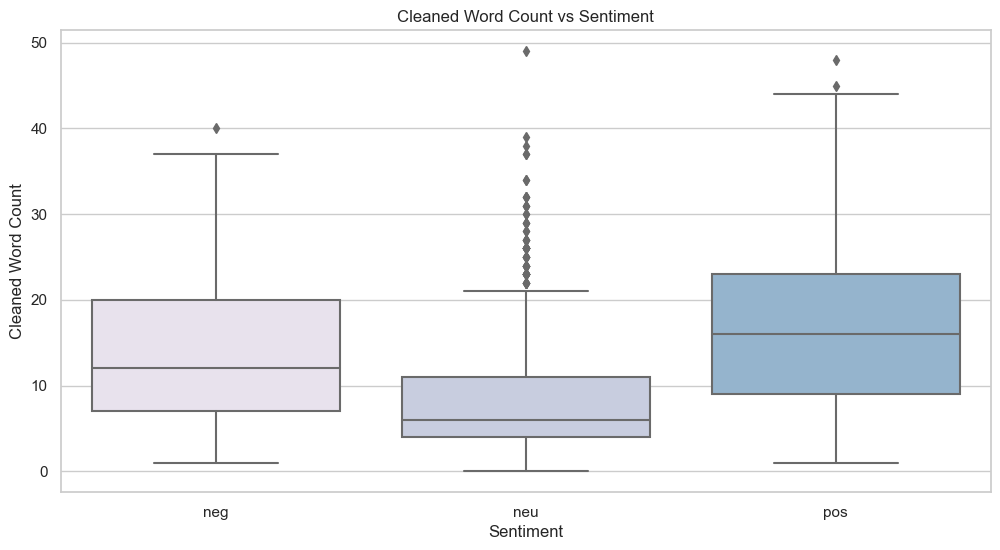

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='cleaned_word_count', data=df, order=['neg', 'neu', 'pos'])
plt.title('Cleaned Word Count vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Cleaned Word Count')
plt.show()


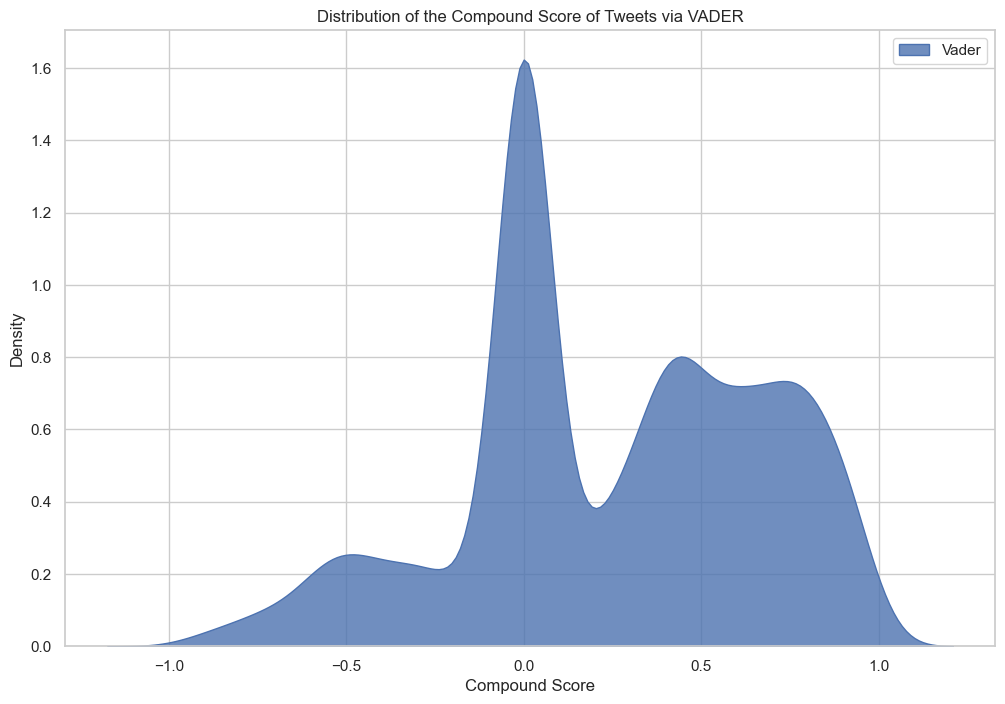

In [61]:
# Visualizing VADER compound scores
fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.kdeplot(df['compound'],shade=True, legend='Vader', alpha=0.8)
ax.set_xlabel('Compound Score')
ax.set_title('Distribution of the Compound Score of Tweets via VADER')
plt.legend(['Vader'])
plt.show()


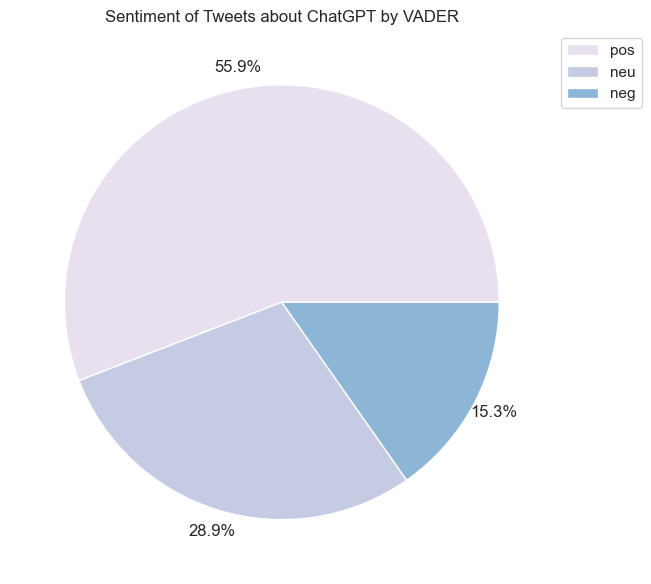

In [62]:
sns.set_palette('PuBuGn')
fig,ax=plt.subplots(1,1,figsize=(8,6))
pie_1 = df['sentiment'].value_counts()
plt.pie(pie_1, autopct="%.1f%%", pctdistance=1.1)
plt.legend(labels = pie_1.index, 
          bbox_to_anchor=[1,1])
plt.title('Sentiment of Tweets about ChatGPT by VADER')
plt.tight_layout()
plt.show()


# Topic Modeling


In [66]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
df['tokens'] = df['cleaned_tweets'].apply(lambda x: word_tokenize(x))

In [68]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words = 'english')
dtm = cv.fit_transform(df['cleaned_tweets'])

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words = 'english')
tfidf = vectorizer.fit_transform(df['cleaned_tweets'])

In [69]:
len(cv.get_feature_names())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4305

In [70]:
# Create Dictionary 
id2word = corpora.Dictionary(df['tokens'])  
# Create Corpus 
texts = df['tokens']  
# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]  

In [71]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=6, random_state=42)

C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin 

C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin 

C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin 

C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin 

C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin 

C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin 

C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin 

In [72]:
from pprint import pprint

pprint(lda_model.print_topics())

[(0,
  '0.067*"chatgpt" + 0.008*"ai" + 0.007*"using" + 0.006*"think" + 0.005*"good" '
  '+ 0.005*"use" + 0.004*"ask" + 0.004*"doctor" + 0.004*"people" + '
  '0.004*"study"'),
 (1,
  '0.078*"chatgpt" + 0.016*"code" + 0.014*"temu" + 0.012*"gpt" + 0.010*"got" + '
  '0.009*"know" + 0.008*"app" + 0.008*"ai" + 0.007*"asked" + 0.006*"tell"'),
 (2,
  '0.078*"chatgpt" + 0.016*"ai" + 0.012*"like" + 0.008*"prompt" + '
  '0.007*"thing" + 0.005*"would" + 0.005*"use" + 0.005*"code" + 0.005*"job" + '
  '0.004*"asked"'),
 (3,
  '0.053*"chatgpt" + 0.029*"ai" + 0.009*"audible" + 0.008*"today" + '
  '0.008*"code" + 0.008*"use" + 0.007*"amp" + 0.007*"free" + 0.006*"kindle" + '
  '0.006*"time"'),
 (4,
  '0.065*"chatgpt" + 0.033*"ai" + 0.010*"artificial" + 0.010*"intelligence" + '
  '0.009*"use" + 0.006*"news" + 0.006*"gpt" + 0.005*"openai" + 0.005*"used" + '
  '0.004*"better"'),
 (5,
  '0.059*"chatgpt" + 0.015*"ai" + 0.009*"use" + 0.008*"like" + 0.007*"using" + '
  '0.007*"make" + 0.006*"used" + 0.005*"goo

In [73]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model, corpus, id2word, sort_topics=False)
lda_display

C:\Users\Ritvik Raj\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.076200  0.104364       1        1  14.681131
1     -0.146951 -0.004761       2        1  16.872607
2     -0.057601  0.029818       3        1  18.541350
3      0.074928 -0.122355       4        1  15.069480
4      0.006234 -0.062668       5        1  17.288774
5      0.047190  0.055603       6        1  17.546658, topic_info=            Term         Freq        Total Category  logprob  loglift
1783        temu   211.000000   211.000000  Default  30.0000  30.0000
665         code   355.000000   355.000000  Default  29.0000  29.0000
16            ai  1238.000000  1238.000000  Default  28.0000  28.0000
3434     audible    99.000000    99.000000  Default  27.0000  27.0000
448   artificial   139.000000   139.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
333          get    37.610832   176.157611   Topic6  -5.7578   0.1962
142         time    38.625689   244.402088   Topic6  -5.7312  -0.1046
80           day    34.547145   124.637062   Topic6  -5.8428   0.4572
401       prompt    35.434672   190.498950   Topic6  -5.8174   0.0584
128       people    34.734073   214.305780   Topic6  -5.8374  -0.0794

[473 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
171       1  0.012820   access
171       2  0.115378   access
171       3  0.141017   access
171       4  0.640989   access
171       5  0.051279   access
...     ...       ...      ...
933       3  0.048648    yahoo
933       4  0.048648    yahoo
933       5  0.827024    yahoo
933       6  0.048648    yahoo
3123      4  0.941836  yomiuri

[1162 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

In [74]:
topic_results = [lda_model.get_document_topics(doc) for doc in corpus]
topic_nums = [max(topics, key=lambda x: x[1])[0] for topics in topic_results]
df['TopicNum'] = topic_nums

In [75]:
dic= {0:'Non-Fiction Book',1:'Fiction Book',2:'Work Products',3:'Music',4:'Movies',5:'Misc'}
df['Topic'] = df['TopicNum'].map(dic)
 
print(dic)

{0: 'Non-Fiction Book', 1: 'Fiction Book', 2: 'Work Products', 3: 'Music', 4: 'Movies', 5: 'Misc'}


In [76]:
df

,tweets,cleaned_tweets,scores,compound,sentiment,word_count,cleaned_word_count,tokens,TopicNum,Topic
0,"Noun: sedan\n\nA sedan is like a car, but it's...",noun sedan sedan like car little fancy like ca...,"{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp...",0.7650,pos,35,19,"[noun, sedan, sedan, like, car, little, fancy,...",5,Misc
1,"AI creation story ""Humans and AI, beyond the d...",ai creation story human ai beyond difference a...,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...",0.7650,pos,50,35,"[ai, creation, story, human, ai, beyond, diffe...",2,Work Products
2,Renowned Israeli Writer Compares ChatGPT To We...,renowned israeli writer compare chatgpt weapon...,"{'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'comp...",-0.7906,neg,32,21,"[renowned, israeli, writer, compare, chatgpt, ...",0,Non-Fiction Book
3,#Zcash $ZEC #Bitcoin #Ethereum #AI #ChatGPT ht...,zcash zec bitcoin ethereum ai chatgpt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,7,6,"[zcash, zec, bitcoin, ethereum, ai, chatgpt]",4,Movies
4,Chatbots won't replace doctors. But a new stud...,chatbots replace doctor new study found chatgp...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.4019,pos,19,13,"[chatbots, replace, doctor, new, study, found,...",0,Non-Fiction Book
...,...,...,...,...,...,...,...,...,...,...
4949,@artificialguybr some things doesn't sound muc...,thing sound much like good chatgpt thing,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...",0.6597,pos,16,7,"[thing, sound, much, like, good, chatgpt, thing]",2,Work Products
4950,@SerLeighton Thanks. I don’t think that ChatGP...,thanks think chatgpt could write drama portfol...,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.4404,pos,19,10,"[thanks, think, chatgpt, could, write, drama, ...",2,Work Products
4951,"What's more, I don't even use chatgpt because ...",even use chatgpt already writing use basically...,"{'neg': 0.148, 'neu': 0.615, 'pos': 0.238, 'co...",0.2960,pos,42,18,"[even, use, chatgpt, already, writing, use, ba...",2,Work Products
4952,Incredible! I got the TEMU invitation code &lt...,incredible got temu invitation code lt gt chat...,"{'neg': 0.055, 'neu': 0.578, 'pos': 0.367, 'co...",0.8957,pos,38,25,"[incredible, got, temu, invitation, code, lt, ...",1,Fiction Book


In [77]:
average_scores = df.groupby('Topic')['compound'].mean().sort_values(ascending=False)

In [78]:
average_scores

Topic
Music               0.298401
Work Products       0.264656
Fiction Book        0.262415
Misc                0.262325
Movies              0.236604
Non-Fiction Book    0.171729
Name: compound, dtype: float64